## HIERARCHICAL CLUSTERING

Lets import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [86]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [36]:
data = df.copy()

In [3]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

In [6]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

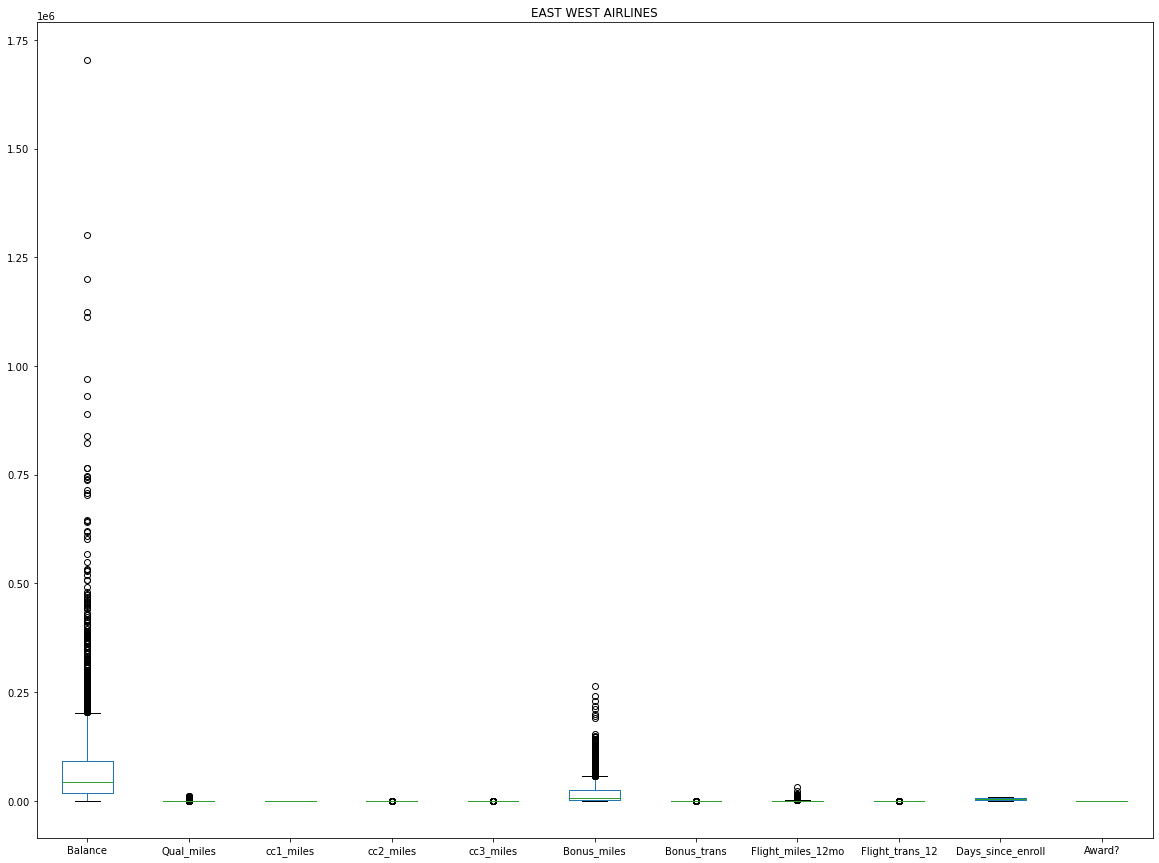

In [7]:
plt.rcParams['figure.figsize'] = (20,15)
df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']].plot(kind='box', title = "EAST WEST AIRLINES")
plt.show()

From the above chart we can see there are many outliers in the data

<AxesSubplot:xlabel='cc3_miles', ylabel='Count'>

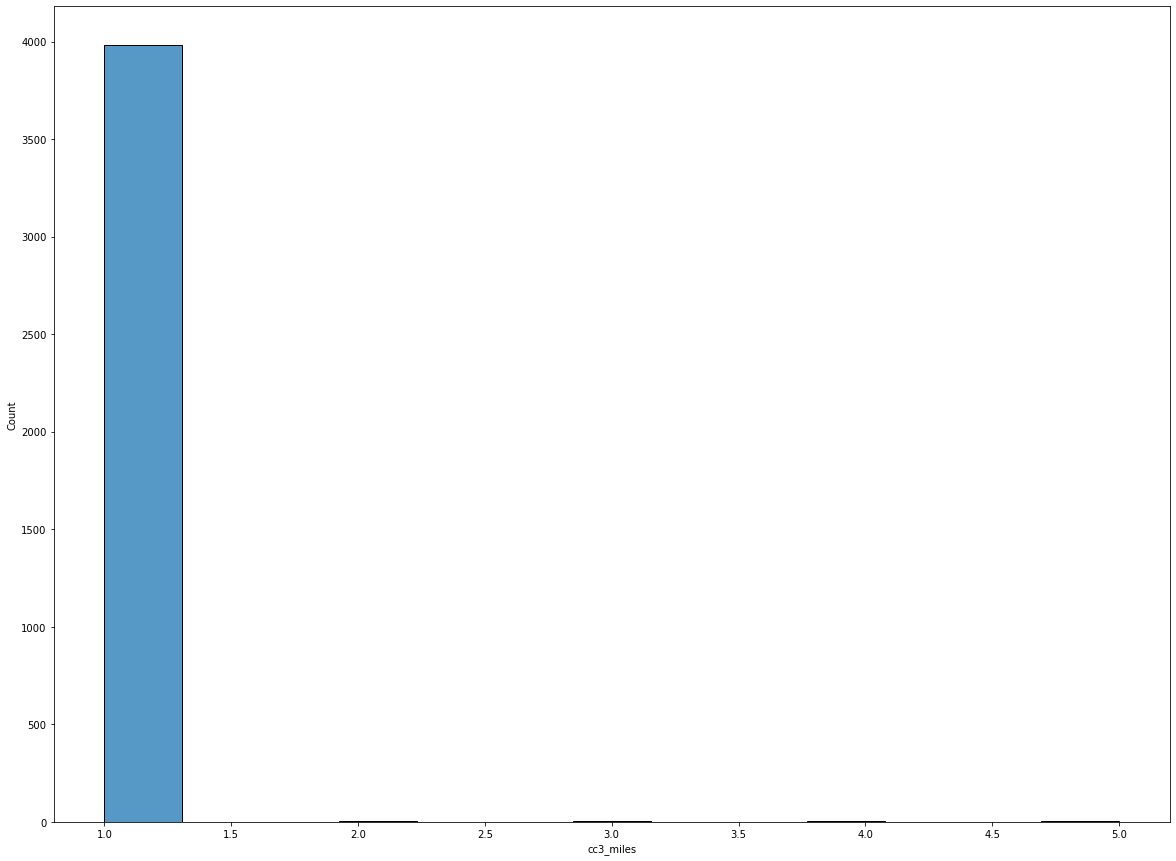

In [12]:
sns.histplot(df['cc3_miles'])

In [20]:
df['Award?'].value_counts() / df.shape[0] # In awards we can see 63% of ID's are 0

0    0.629657
1    0.370343
Name: Award?, dtype: float64

Lets check for correaltion 

In [87]:
df = df.drop(columns='ID#') # Dropping ID column from the dataset
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

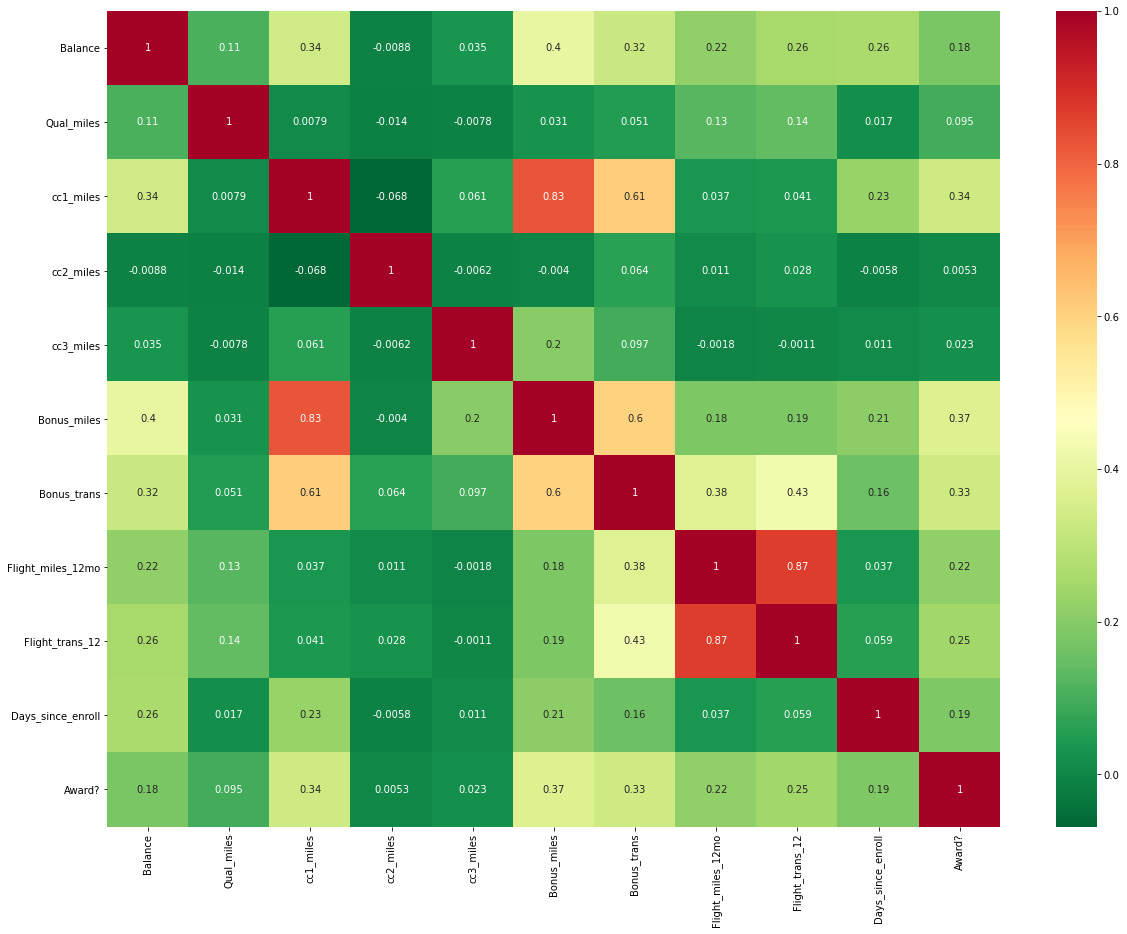

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn_r')

We saw there are too many outliers in the data, lets apply different EDA techniques to get our data within range and see how HC will looks like for each modulation

Lets check the number of duplicate records if any

In [88]:
df.duplicated().sum()

1

There is one Duplicate record

In [89]:
duplicate = df[df.duplicated()]
duplicate

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


We will remove this duplicate value from the dataset

In [90]:
df.drop_duplicates(inplace=True)
df.shape

(3998, 11)

Now that duplicates are removed lets see how we can handle the outlier values

First lets check how many values are outside of IQR range in each column

In [91]:
Q1 = df.quantile(0.25)  # To create 25th Percentile
Q3 = df.quantile(0.75)  # To create 75th percentile

IQR = Q3 - Q1 # Getting IQR Value

In [92]:
IQR

Balance              73870.75
Qual_miles               0.00
cc1_miles                2.00
cc2_miles                0.00
cc3_miles                0.00
Bonus_miles          22560.75
Bonus_trans             14.00
Flight_miles_12mo      313.50
Flight_trans_12          1.00
Days_since_enroll     3459.50
Award?                   1.00
dtype: float64

In [93]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          279
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64

As we can see many columns have outliers, we will use mutliple ways to cluster our data

1 - We will use the whole data without removing outliers - We will Normalise our data and use clustering techniques
2 - We will standardize our data without removig outliers 
3 - We will remove outliers and normalize our data
4 - We will remove outliers and standardize our data
5 - We will replace outliers with their IQR value and normalize our data
6 - We will replace outliers with their IQR value and standardize our data

## 1 - Using whole dataset, without removing outliers  and Normalizing our dataset

Lets create a function `norm_func` which will normalize our dataset

In [94]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

norm = df.copy()

df_norm = norm_func(norm)
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,0.043183,0.012931,0.264945,0.007254,0.003064,0.065036,0.134940,0.014932,0.025923,0.496406,0.370435
std,0.059115,0.069408,0.344247,0.073834,0.048816,0.091596,0.111666,0.045441,0.071577,0.248976,0.482982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010872,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280836,0.000000
50%,0.025303,0.000000,0.000000,0.000000,0.000000,0.027241,0.139535,0.000000,0.000000,0.493791,0.000000
75%,0.054202,0.000000,0.500000,0.000000,0.000000,0.090300,0.197674,0.010173,0.018868,0.697944,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see now every column has min value of 0 amd max value of 1

## Lets cluster our dataset

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

## Using Complete Method

In [41]:
z = linkage(df_norm, method = 'complete', metric = 'euclidean')
z

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99100000e+03, 1.96828291e+00, 1.46900000e+03],
       [7.99300000e+03, 7.99400000e+03, 2.18401946e+00, 3.99500000e+03],
       [7.96900000e+03, 7.99500000e+03, 2.30780192e+00, 3.99900000e+03]])

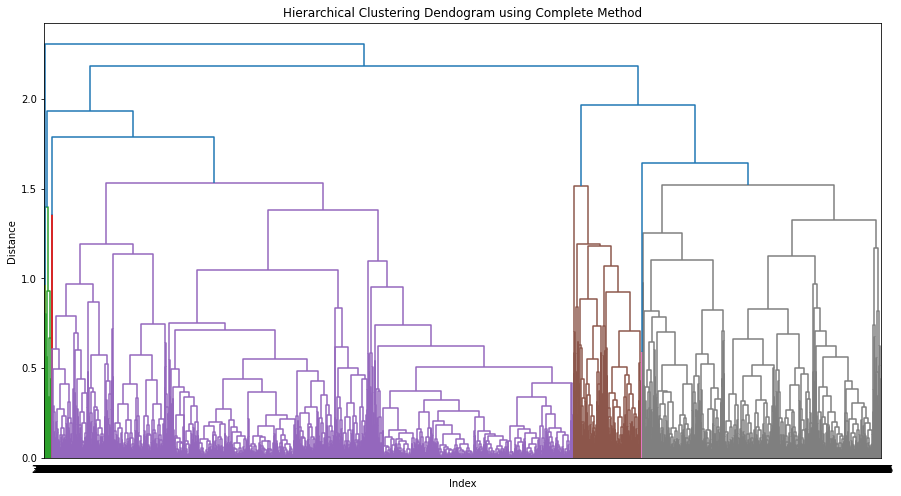

In [42]:
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

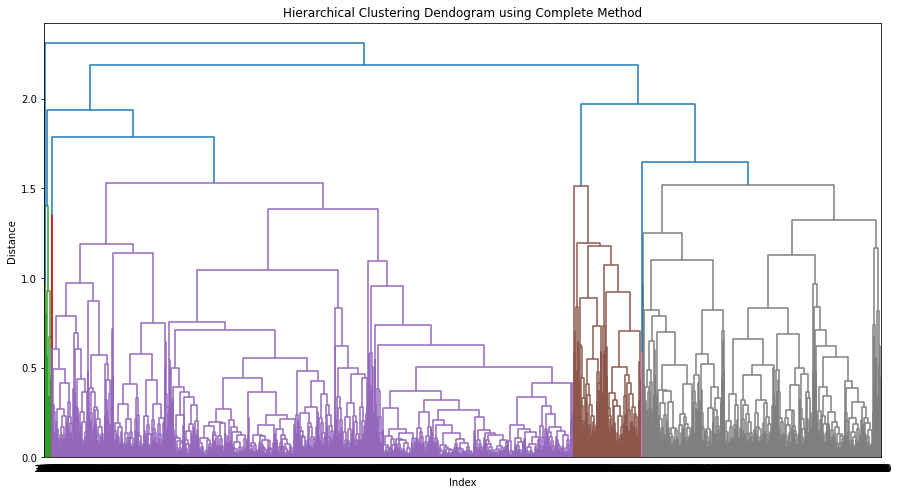

In [43]:
# Trying different Options
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=90,
              leaf_font_size=8)
plt.show()

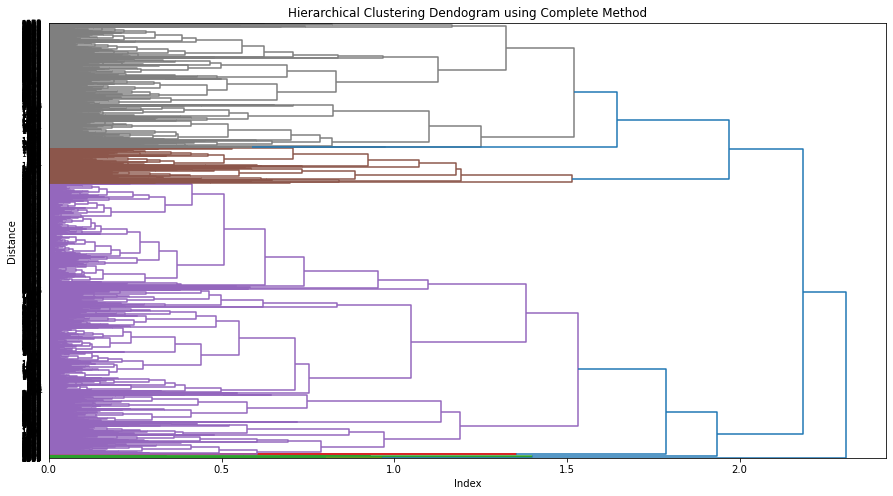

In [44]:
# Trying different Options
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=1,
              leaf_font_size=8,
              orientation='right')
plt.show()

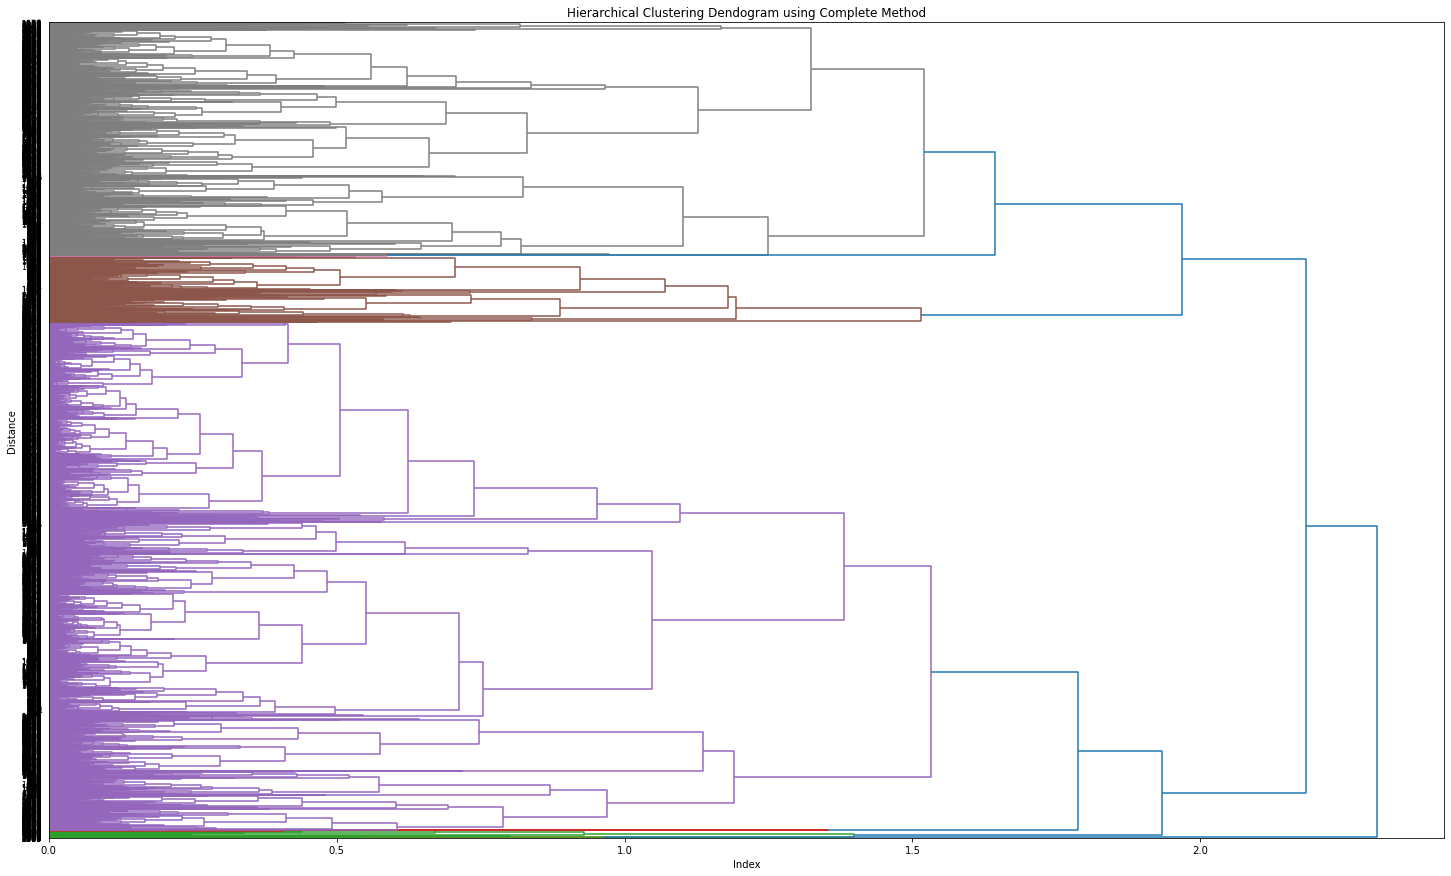

In [45]:
# Trying different Options
plt.figure(figsize= (25,15));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=1,
              leaf_font_size=8,
              orientation='right')
plt.show()

## Lets use Single Method 

In [47]:
z_min = linkage(df_norm, method = 'single', metric = 'euclidean')
z_min

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [2.84000000e+03, 7.99300000e+03, 6.68658124e-01, 1.48000000e+03],
       [3.58300000e+03, 7.99400000e+03, 7.03214726e-01, 1.48100000e+03],
       [7.99200000e+03, 7.99500000e+03, 1.00000001e+00, 3.99900000e+03]])

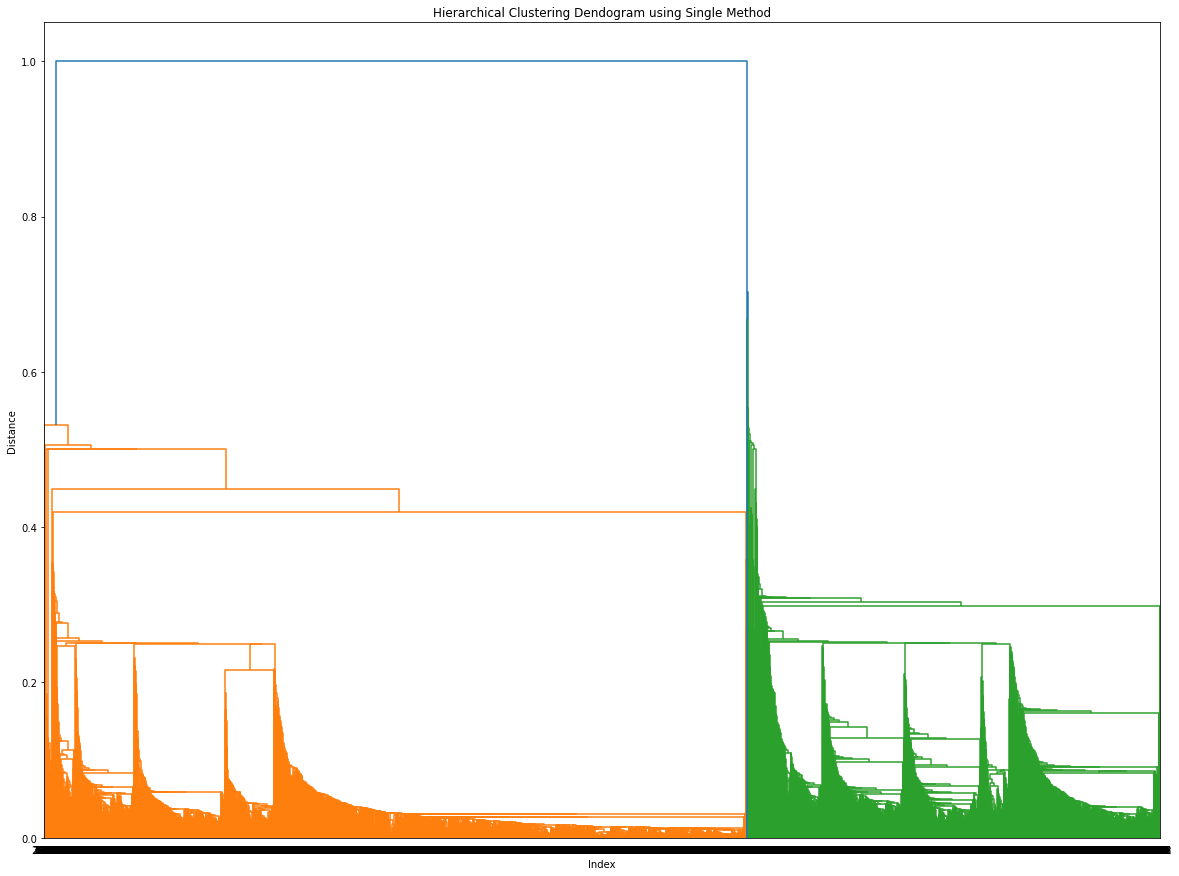

In [48]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Single Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_min, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

## Lets use Centroid Method

In [49]:
z_cen = linkage(df_norm, method = 'centroid', metric = 'euclidean')
z_cen

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.99100000e+03, 7.99300000e+03, 1.03907613e+00, 3.99400000e+03],
       [2.75000000e+02, 7.99400000e+03, 1.33172762e+00, 3.99500000e+03],
       [7.98600000e+03, 7.99500000e+03, 1.47225644e+00, 3.99900000e+03]])

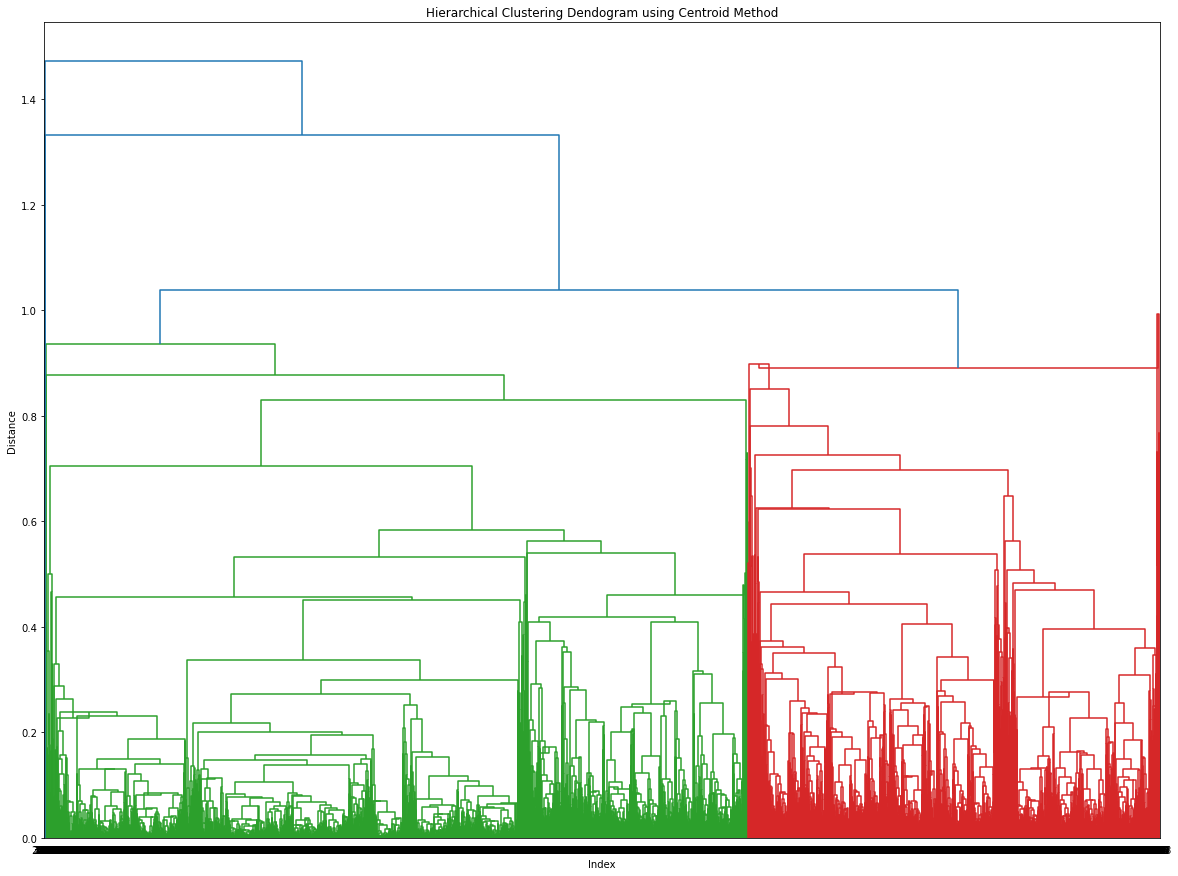

In [50]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Centroid Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_cen, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

## Lets use WARD method

In [51]:
z_ward = linkage(df_norm, method = 'ward', metric = 'euclidean')
z_ward

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99200000e+03, 1.84248318e+01, 1.48100000e+03],
       [7.99100000e+03, 7.99300000e+03, 1.92229591e+01, 2.51800000e+03],
       [7.99400000e+03, 7.99500000e+03, 4.48802298e+01, 3.99900000e+03]])

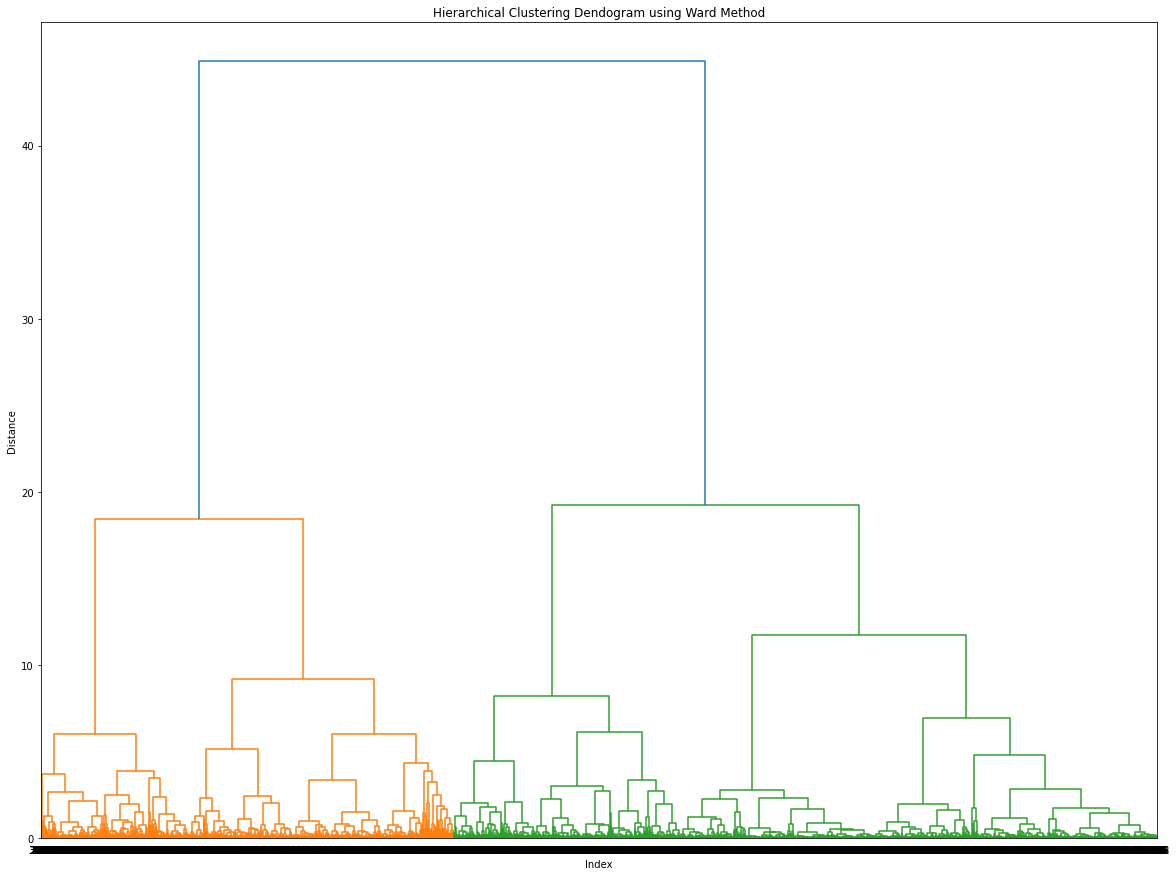

In [52]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Ward Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

The above chart shows we can have 4 cluster using Wards method

## Lets use Average method

In [53]:
z_avg = linkage(df_norm, method = 'average', metric = 'euclidean')
z_avg

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.99100000e+03, 7.99300000e+03, 1.21686304e+00, 3.99400000e+03],
       [2.75000000e+02, 7.99400000e+03, 1.47970969e+00, 3.99500000e+03],
       [7.98500000e+03, 7.99500000e+03, 1.67257446e+00, 3.99900000e+03]])

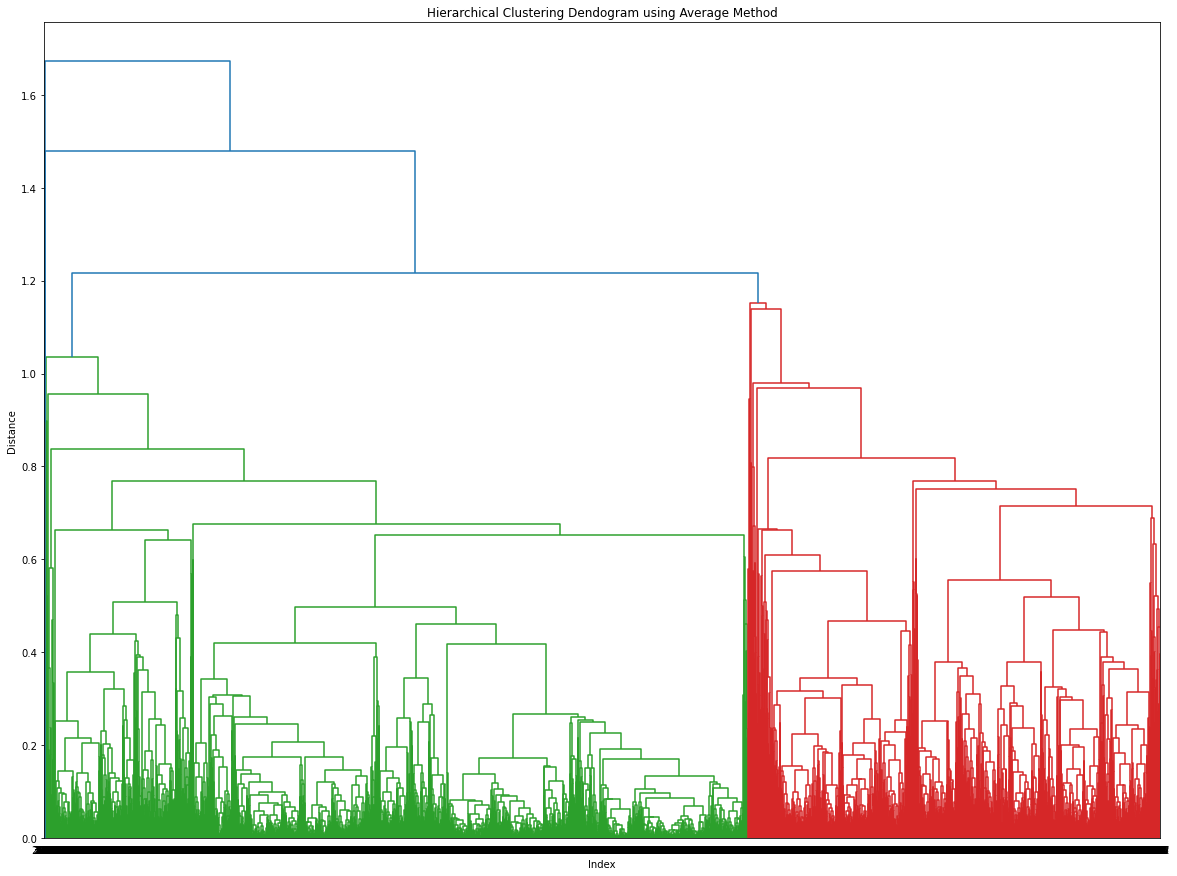

In [54]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Average Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_avg, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

In [56]:
z_com_man = linkage(df_norm, method = 'complete', metric = 'mahalanobis')
z_com_man

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.67800000e+03, 2.67900000e+03, 2.74128451e-03, 2.00000000e+00],
       [3.49100000e+03, 3.99800000e+03, 2.75734112e-03, 2.00000000e+00],
       ...,
       [7.99200000e+03, 7.99300000e+03, 2.67471465e+01, 3.97700000e+03],
       [7.98700000e+03, 7.99400000e+03, 2.97101508e+01, 3.99200000e+03],
       [7.98900000e+03, 7.99500000e+03, 3.32126567e+01, 3.99900000e+03]])

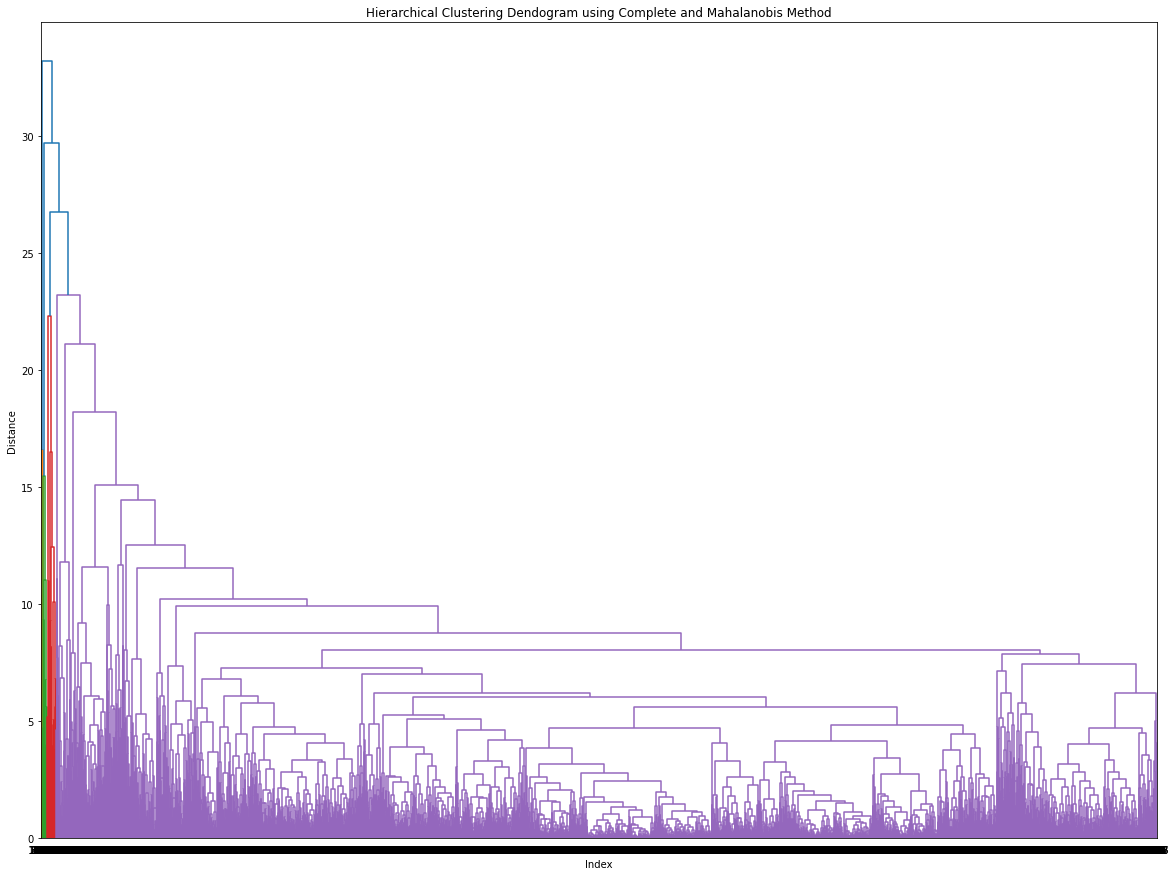

In [57]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Complete and Mahalanobis Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_com_man, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

In [60]:
z_sing_man = linkage(df_norm, method = 'single', metric = 'mahalanobis')
z_sing_man

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.67800000e+03, 2.67900000e+03, 2.74128451e-03, 2.00000000e+00],
       [3.49100000e+03, 3.99800000e+03, 2.75734112e-03, 2.00000000e+00],
       ...,
       [1.30000000e+03, 7.99300000e+03, 7.52826507e+00, 3.99700000e+03],
       [2.01500000e+03, 7.99400000e+03, 8.44729934e+00, 3.99800000e+03],
       [3.58300000e+03, 7.99500000e+03, 1.03747669e+01, 3.99900000e+03]])

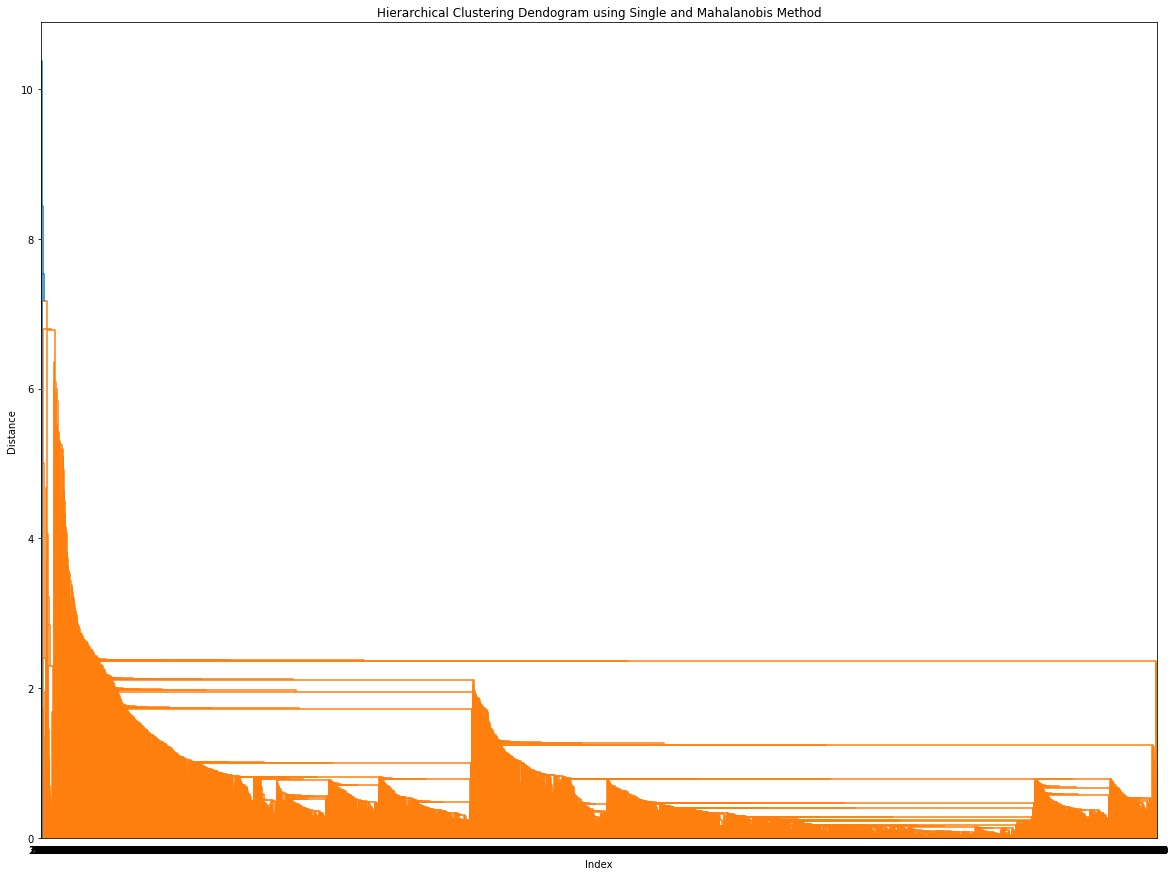

In [61]:
plt.figure(figsize= (20,15));plt.title("Hierarchical Clustering Dendogram using Single and Mahalanobis Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_sing_man, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

With all the above visuals, the easiest way to identify cluster was Ward with Eucledian distance, lets use that

In [62]:
h_ward = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity = 'euclidean').fit(df_norm)
h_ward.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
cluster_lables = pd.Series(h_ward.labels_)

In [64]:
df['clust'] = cluster_lables

In [65]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [67]:
df1 = df.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
df1

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,0,19244,0,1,1,1,215,2,0,0,6968,0
2,0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,14776,0,1,1,1,500,1,0,0,6952,0
4,3,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1,18476,0,1,1,1,8525,4,200,1,1403,1
3995,1,64385,0,1,1,1,981,5,0,0,1395,1
3996,1,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0,54899,0,1,1,1,500,1,500,1,1401,0


In [72]:
df2 = df1.iloc[:,1:].groupby(df1['clust']).mean()


In [73]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
1,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0


In [75]:
df2.to_csv('EastWestAirlines_WardEuclidean.csv', encoding='utf-8')

In [95]:
h_z = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity = 'euclidean').fit(df_norm)
h_z.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [96]:
cluster_lables = pd.Series(h_z.labels_)

In [97]:
df['clust'] = cluster_lables

In [98]:
df1 = df.iloc[:,[11,0,1,2,3,4,5,6,7,8,9,10]]
df1

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,28143,0,1,1,1,174,1,0,0,7000,0
1,0.0,19244,0,1,1,1,215,2,0,0,6968,0
2,0.0,41354,0,1,1,1,4123,4,0,0,7034,0
3,0.0,14776,0,1,1,1,500,1,0,0,6952,0
4,1.0,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2.0,18476,0,1,1,1,8525,4,200,1,1403,1
3995,2.0,64385,0,1,1,1,981,5,0,0,1395,1
3996,0.0,73597,0,3,1,1,25447,8,0,0,1402,1
3997,0.0,54899,0,1,1,1,500,1,500,1,1401,0


In [99]:
df2 = df1.iloc[:,1:].groupby(df1['clust']).mean()
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0.0,59943.255050,89.789703,1.711683,1.018614,1.011089,10484.440792,9.246733,232.131485,0.676040,3825.910891,0.012673
1.0,156794.169231,208.673846,4.649231,1.000000,1.061538,69893.055385,23.206154,1020.510769,3.200000,5770.547692,0.996923
2.0,80039.257218,245.308836,2.091864,1.009624,1.000875,16720.251094,13.323710,736.767279,2.230096,4306.622922,0.980752
3.0,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


In [100]:
df2.to_csv("EastWestAirlines_Complete_Euclidean.csv", encoding='utf-8')

## ---------------------------- ### ------------------------#### ------------------

Based on the above analysis, we can cluster better with WARD method using Eclidean Method. 